In [1]:
# SelectiveSearch groups pixels of an image based on the pixel intensities,
# which in turns, leverages the color, texture, size, and shape of content withing the image.

# Initially, it over-segments an image by grouping (hierarchical) pixels.
# Next, it iterates over the previous segments and group them based on similarity.{
#     it continues combining smaller regions to form a larger region.
# }

In [2]:
!pip install selectivesearch
!pip install torch_snippets

In [3]:
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb
import matplotlib.pyplot as plt

Image Shape = (720, 1280, 3)
Image Type = <class 'numpy.ndarray'>


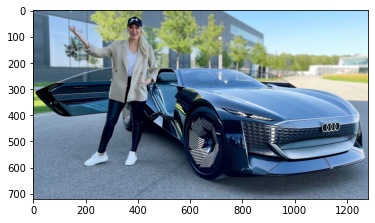

In [4]:
img = read('/content/car.jpg', 1)
print(f'Image Shape = {img.shape}\nImage Type = {type(img)}')
plt.imshow(img)
plt.show()

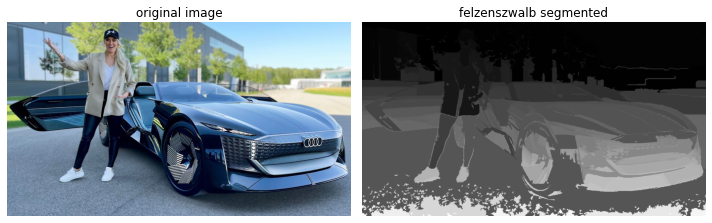

In [5]:
segments_fz = felzenszwalb(img, scale=400)
subplots([img, segments_fz], 
         titles=['original image', 'felzenszwalb segmented'],
         sz=10, nc=2)

In [6]:
# SelectiveSearch Begins
def extract_candidates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=400, min_size=100)
    # regions : list of dictionaries, i.e. {'labels': [1.0, ...], 'rect': (528, 0, 171, 0), 'size': 172}
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (.1*img_area): continue
        if r['size'] >= (.75*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates

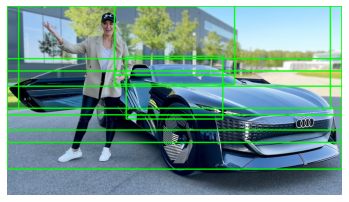

In [7]:
candidates = extract_candidates(img)
show(img, bbs=candidates, sz=6)